In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph,END,START

In [3]:
class Agentstate(TypedDict):
    ls:list[int]
    counter:int
    name:str

In [48]:
import random
def greet_persion(state:Agentstate):
    """this is the greeting to the persion"""
    state['name'] = f"Hey! {state['name']}"
    state['counter'] = 0
    return state

def random_node(state:Agentstate):
    """this is the generated step where the random number is added to the list"""
    state['counter'] = state['counter'] + 1
    state['ls'].append(random.randint(0,10))
    return state

def should_continue(state:Agentstate):
    """this is the state where the node is tell that should continue on looping or not"""
    if state['counter'] < 5:
        return "continue"
    else:
        return "break"

In [49]:
graph = StateGraph(Agentstate)
graph.add_node("greeting",greet_persion)
graph.add_node("random",random_node)
graph.add_edge(START,"greeting")
graph.add_edge("greeting","random")
graph.add_conditional_edges(
"random",
should_continue,
{
    "continue":"random",
    "break":END
}


)

app = graph.compile()

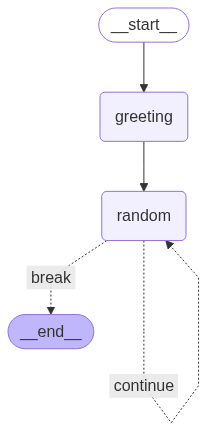

In [50]:
app

In [51]:
intial_state = Agentstate(counter=-1,name='kishan',ls=[])

In [52]:
app.invoke(intial_state)

{'ls': [0, 4, 4, 8, 10], 'counter': 5, 'name': 'Hey! kishan'}

In [54]:
# !pip install python-dotenv

In [56]:
# !pip install langchain_google_genai